In [16]:
import gc
import math
import os

import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from tqdm import tqdm, tqdm_notebook

sns.set(style='darkgrid')
train_path = '../../input/hy_round1_train_20200102'
test_path = '../../input/hy_round1_testA_20200102'

In [2]:
train_files = os.listdir(train_path)
test_files = os.listdir(test_path)

print(f"训练样本：{len(train_files)}")
print(f"测试样本：{len(test_files)}")

训练样本：7000
测试样本：2000


In [3]:
train_files[:3]

['0.csv', '1.csv', '10.csv']

In [4]:
test_files[:3]

['7000.csv', '7001.csv', '7002.csv']

### 维度检查

随便挑选几个数据集检查一下数据，维度并不统一。

In [5]:
df = pd.read_csv(f'{train_path}/6966.csv')
print(f"作业类型：{df['type'].unique()}")
print(f"数据维度：{df.shape}")

作业类型：['围网']
数据维度：(389, 7)


In [6]:
df = pd.read_csv(f'{train_path}/66.csv')
print(f"作业类型：{df['type'].unique()}")
print(f"数据维度：{df.shape}")

作业类型：['围网']
数据维度：(353, 7)


In [7]:
df.head()

,渔船ID,x,y,速度,方向,time,type
0,66,6.606038e+06,5.900305e+06,0.0,0,1123 23:52:01,围网
1,66,6.606038e+06,5.900305e+06,0.0,0,1123 23:42:01,围网
2,66,6.606038e+06,5.900305e+06,0.0,0,1123 23:32:01,围网
3,66,6.606038e+06,5.900305e+06,0.0,0,1123 23:22:01,围网
4,66,6.606038e+06,5.900305e+06,0.0,0,1123 23:12:01,围网


In [8]:
df.shape[0]

353

In [15]:
del df
gc.collect()

NameError: name 'df' is not defined

### 全部维度检查

检查内容：

- 一个ID是否多种作业？
- 数据shape最大最小？

In [17]:
# train

empty_type = []
one_type = []
mul_type = []
strange_type = []
max_report = 0
min_report = 99999

for file in tqdm_notebook(train_files):
    df = pd.read_csv(f'{train_path}/{file}')
    
    # 最长最短数据统计
    if df.shape[0] > max_report:
        max_report      = df.shape[0]
        max_report_file = file
    if df.shape[0] < min_report:
        min_report      = df.shape[0]
        min_report_file = file
    
    # 作业类型统计
    if len(df['type'].unique()) == 0:
        empty_type.append(file)
    elif len(df['type'].unique()) == 1:
        one_type.append(file)
    elif len(df['type'].unique()) > 1:
        mul_type.append(file)
    else:
        strange_type.append(file)
        
    # 缺失值
    for column in df.columns:
        if df[column].isnull().any():
            print(f"文件：{file} 有数据缺失？")

print(f"最长的report:{max_report}，文件是：{max_report_file}")
print(f"最短的report:{min_report}，文件是：{min_report_file}")

print(f"空作业类型数量：{len(empty_type)}")
print(f"单作业类型数量：{len(one_type)}")
print(f"多作业类型数量：{len(mul_type)}")
print(f"非作业类型数量：{len(strange_type)}")


最长的report:3969，文件是：4924.csv
最短的report:12，文件是：254.csv
空作业类型数量：0
单作业类型数量：7000
多作业类型数量：0
非作业类型数量：0


In [18]:
# test

empty_type = []
one_type = []
mul_type = []
strange_type = []
max_report = 0
min_report = 99999

for file in tqdm_notebook(test_files):
    df = pd.read_csv(f'{test_path}/{file}')
    
    # 最长最短数据统计
    if df.shape[0] > max_report:
        max_report      = df.shape[0]
        max_report_file = file
    if df.shape[0] < min_report:
        min_report      = df.shape[0]
        min_report_file = file
    
    # 作业类型统计
    # pass
        
    # 缺失值
    for column in df.columns:
        if df[column].isnull().any():
            print(f"文件：{file} 有数据缺失？")

print(f"最长的report:{max_report}，文件是：{max_report_file}")
print(f"最短的report:{min_report}，文件是：{min_report_file}")

# print(f"空作业类型数量：{len(empty_type)}")
# print(f"单作业类型数量：{len(one_type)}")
# print(f"多作业类型数量：{len(mul_type)}")
# print(f"非作业类型数量：{len(strange_type)}")


最长的report:3891，文件是：7225.csv
最短的report:21，文件是：7233.csv


In [20]:
gc.collect()

683

### 图片绘制

In [21]:
df_4924 = pd.read_csv(f'{train_path}/4924.csv')
print(f"作业类型：{df_4924['type'].unique()}")
print(f"数据维度：{df_4924.shape}")

作业类型：['围网']
数据维度：(3969, 7)


In [22]:
df_4924.head()

,渔船ID,x,y,速度,方向,time,type
0,4924,6.328956e+06,5.291393e+06,0.38,103,1113 23:59:30,围网
1,4924,6.328956e+06,5.291393e+06,0.05,0,1113 23:58:27,围网
2,4924,6.328956e+06,5.291393e+06,0.00,0,1113 23:57:24,围网
3,4924,6.328956e+06,5.291393e+06,0.05,0,1113 23:56:20,围网
4,4924,6.328956e+06,5.291393e+06,0.05,0,1113 23:55:17,围网


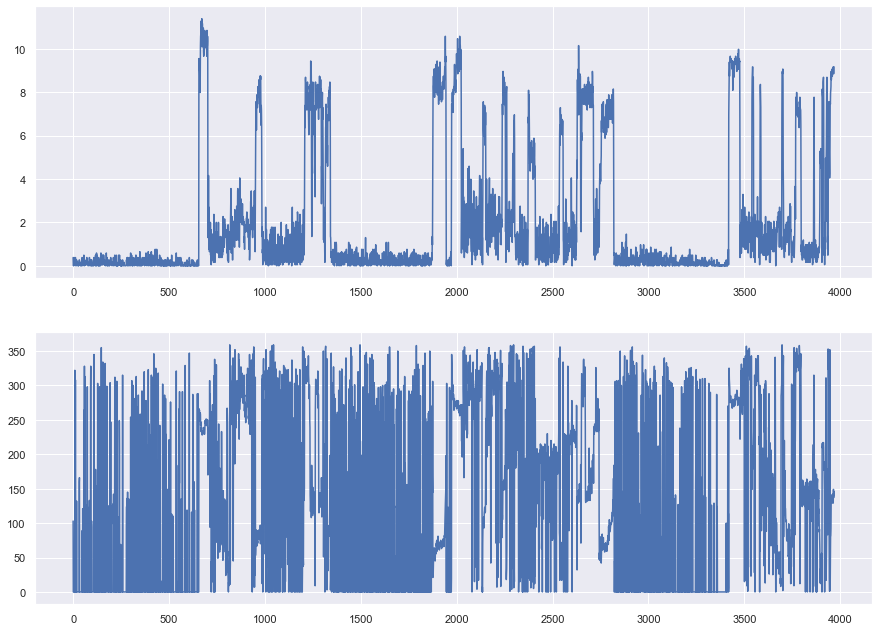

In [24]:
plt.figure(figsize=(15, 11))
for i, col in enumerate(df_4924[['速度', '方向']].columns):
    plt.subplot(2, 1, i + 1)
    plt.plot(df_4924[col])

In [25]:
def df_angle_handle(dataframe):
    if '方向' in dataframe.columns:
        sin_list = []
        cos_list = []
        for angle in dataframe['方向'].values:
            sin_list.append(math.sin(math.radians(angle)))
            cos_list.append(math.cos(math.radians(angle)))
        dataframe['sin_angle'] = sin_list
        dataframe['cos_angle'] = cos_list
        dataframe = dataframe.drop('方向', axis=1)
    else:
        print("没有方向列或已经处理完毕")
    return dataframe

In [26]:
df_4924 = df_angle_handle(df_4924)

In [27]:
df_4924

,渔船ID,x,y,速度,time,type,sin_angle,cos_angle
0,4924,6.328956e+06,5.291393e+06,0.38,1113 23:59:30,围网,0.974370,-0.224951
1,4924,6.328956e+06,5.291393e+06,0.05,1113 23:58:27,围网,0.000000,1.000000
2,4924,6.328956e+06,5.291393e+06,0.00,1113 23:57:24,围网,0.000000,1.000000
3,4924,6.328956e+06,5.291393e+06,0.05,1113 23:56:20,围网,0.000000,1.000000
4,4924,6.328956e+06,5.291393e+06,0.05,1113 23:55:17,围网,0.000000,1.000000
...,...,...,...,...,...,...,...,...
3964,4924,6.342718e+06,5.283126e+06,9.17,1111 00:04:36,围网,0.743145,-0.669131
3965,4924,6.342517e+06,5.283346e+06,8.96,1111 00:03:33,围网,0.515038,-0.857167
3966,4924,6.342316e+06,5.283566e+06,8.85,1111 00:02:30,围网,0.681998,-0.731354
3967,4924,6.342115e+06,5.283786e+06,9.07,1111 00:01:27,围网,0.559193,-0.829038


In [28]:
def show_one_path(df):
    plt.figure(figsize=(50,50))
    plt.plot(df['x'], df['y'])
    X = df['x'].values.flatten()
    Y = df['y'].values.flatten()
    U = df['sin_angle'].values.flatten()
    V = df['cos_angle'].values.flatten()
    plt.quiver(X, Y, U, V, angles="xy",color="#666666")
    
    cur_id = df['渔船ID'].iloc[0] 
    # 中文标题，必要时可以不用
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.title(f'渔船ID：{cur_id}', size=50)
    return 0

0

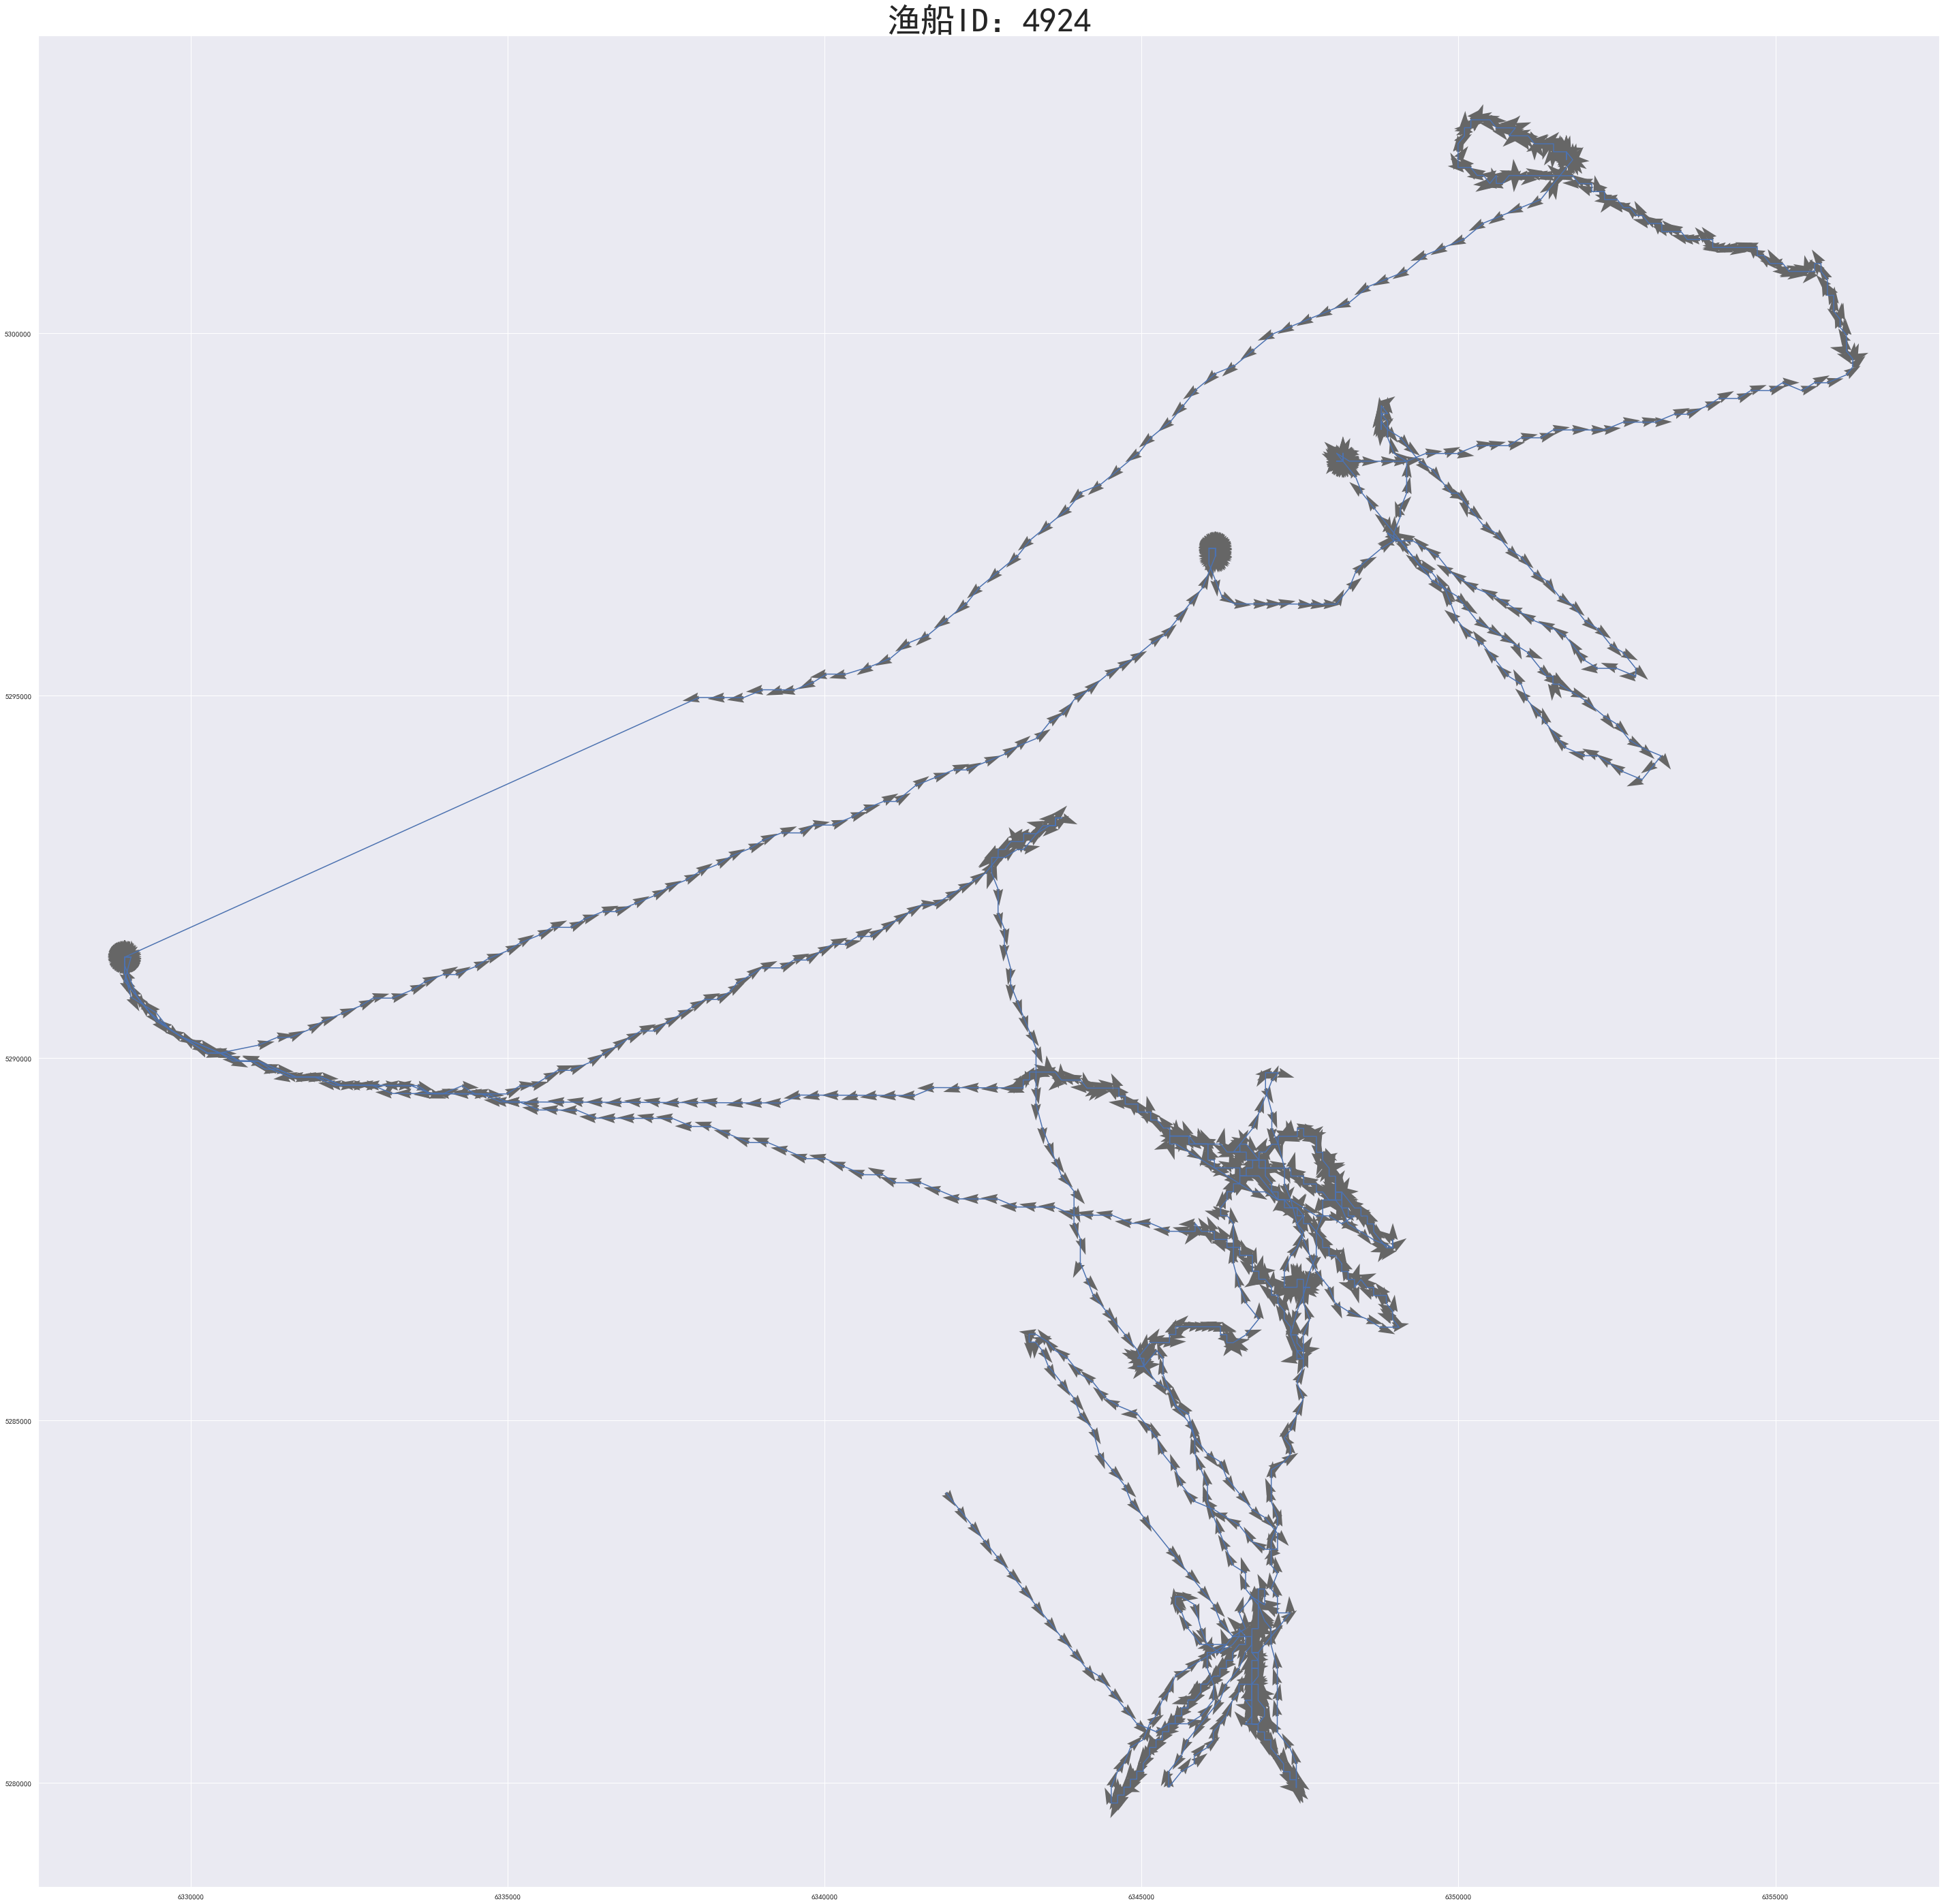

In [29]:
show_one_path(df_4924)

In [30]:
gc.collect()

16791

## 全局统计

### 数据合并

In [32]:
ret = []
for file in tqdm_notebook(train_files):
    df_train = pd.read_csv(f'{train_path}/{file}')
    ret.append(df_train)
df_train = pd.concat(ret)
df_train.columns = ['ship','x','y','v','d','time','type']

In [33]:
df_train.to_hdf('../../input/train.h5', 'df', mode='w')

In [ ]:
ret = []
for file in tqdm_notebook(test_files):
    df_test = pd.read_csv(f'{test_path}/{file}')
    ret.append(df)
df_test = pd.concat(ret)
df_test.columns = ['ship','x','y','v','d','time']

In [ ]:
df_test.to_hdf('../../input/test.h5', 'df', mode='w')

### 相关性分析

In [34]:
df_train.head(5)

,ship,x,y,v,d,time,type
0,0,6.152038e+06,5.124873e+06,2.59,102,1110 11:58:19,拖网
1,0,6.151230e+06,5.125218e+06,2.70,113,1110 11:48:19,拖网
2,0,6.150421e+06,5.125563e+06,2.70,116,1110 11:38:19,拖网
3,0,6.149612e+06,5.125907e+06,3.29,95,1110 11:28:19,拖网
4,0,6.148803e+06,5.126252e+06,3.18,108,1110 11:18:19,拖网


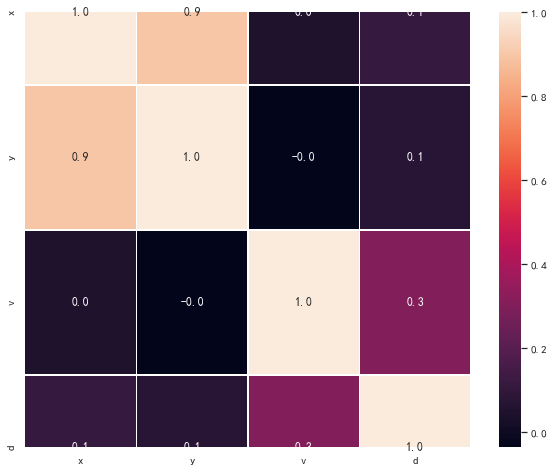

In [39]:
# heatmap

f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_train.drop(['ship', 'time'], axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

### 标签分布

In [40]:
# 字典替换
type_dict = {'拖网': 'Trawl',
             '围网': 'Purse Seine',
             '刺网': 'Gillnet'}

In [41]:
df_unique = df_train.copy()
df_unique['type'].replace(type_dict, inplace=True)

In [42]:
df_type = df_unique.drop_duplicates(subset=['ship'], keep='first')  # 去重

In [43]:
df_type['type'].value_counts()

Trawl          4361
Purse Seine    1621
Gillnet        1018
Name: type, dtype: int64

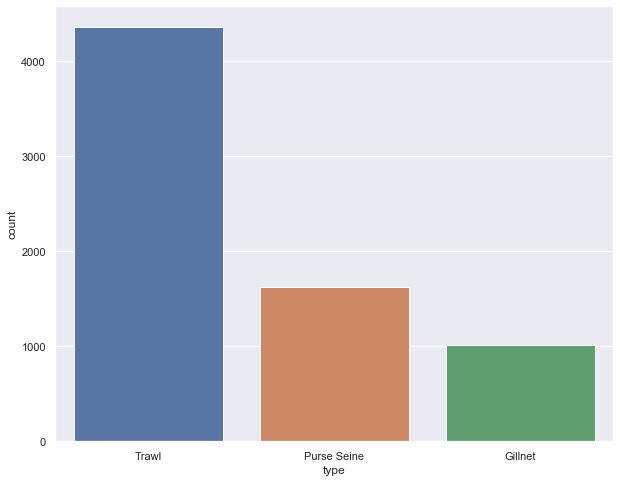

In [44]:
plt.figure(figsize=(10, 8))
sns.set(style='darkgrid')
sns.countplot(x = 'type',
              data = df_type,
              order = df_type['type'].value_counts().index)

plt.show()

```
拖网：4361
围网：1621
刺网：1018
```

### 分布分析

In [59]:
def plot_feature_distribution(df1, df2, label1, label2, features, a=1, b=4):
    """分布对比"""
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(a, b, figsize=(16,10))

    for feature in features:
        i += 1
        plt.subplot(a, b, i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show()

<Figure size 432x288 with 0 Axes>

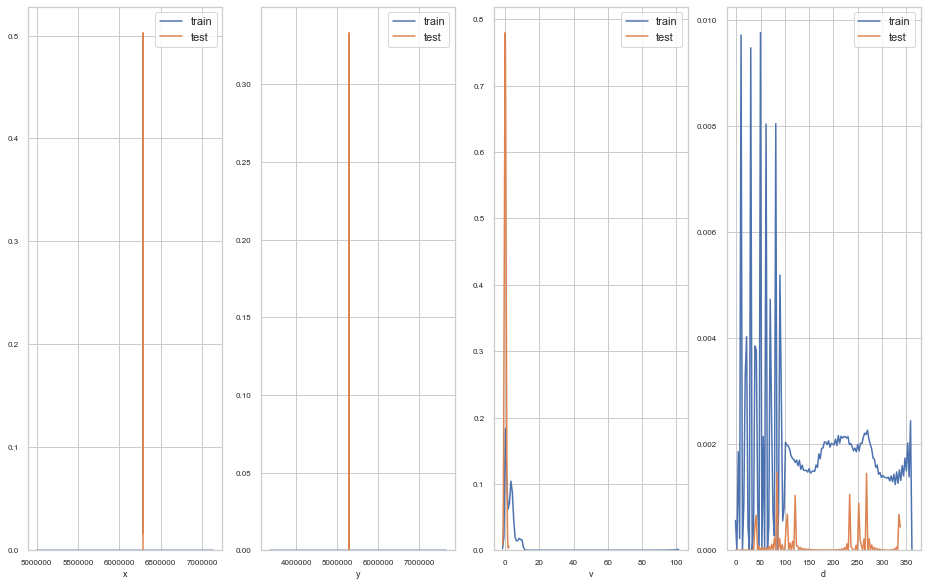

In [60]:
features = df_train.drop(['type', 'time', 'ship'],axis=1).columns.values
plot_feature_distribution(df_train, df_test, 'train', 'test', features)

可以初步判断：

- xy只能取差分，不能直接使用。
- v 有很大值，需要进行处理。分布不太一致。
- 船头朝向？

In [65]:
def plot_feature_class_distribution(classes, tt, features, a=4, b=1):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(a,b,figsize=(16,24))

    for feature in features:
        i += 1
        plt.subplot(a, b, i)
        for clas in classes:
            ttc = tt[tt['type']==clas]
            sns.kdeplot(ttc[feature], bw=0.5, label=clas)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

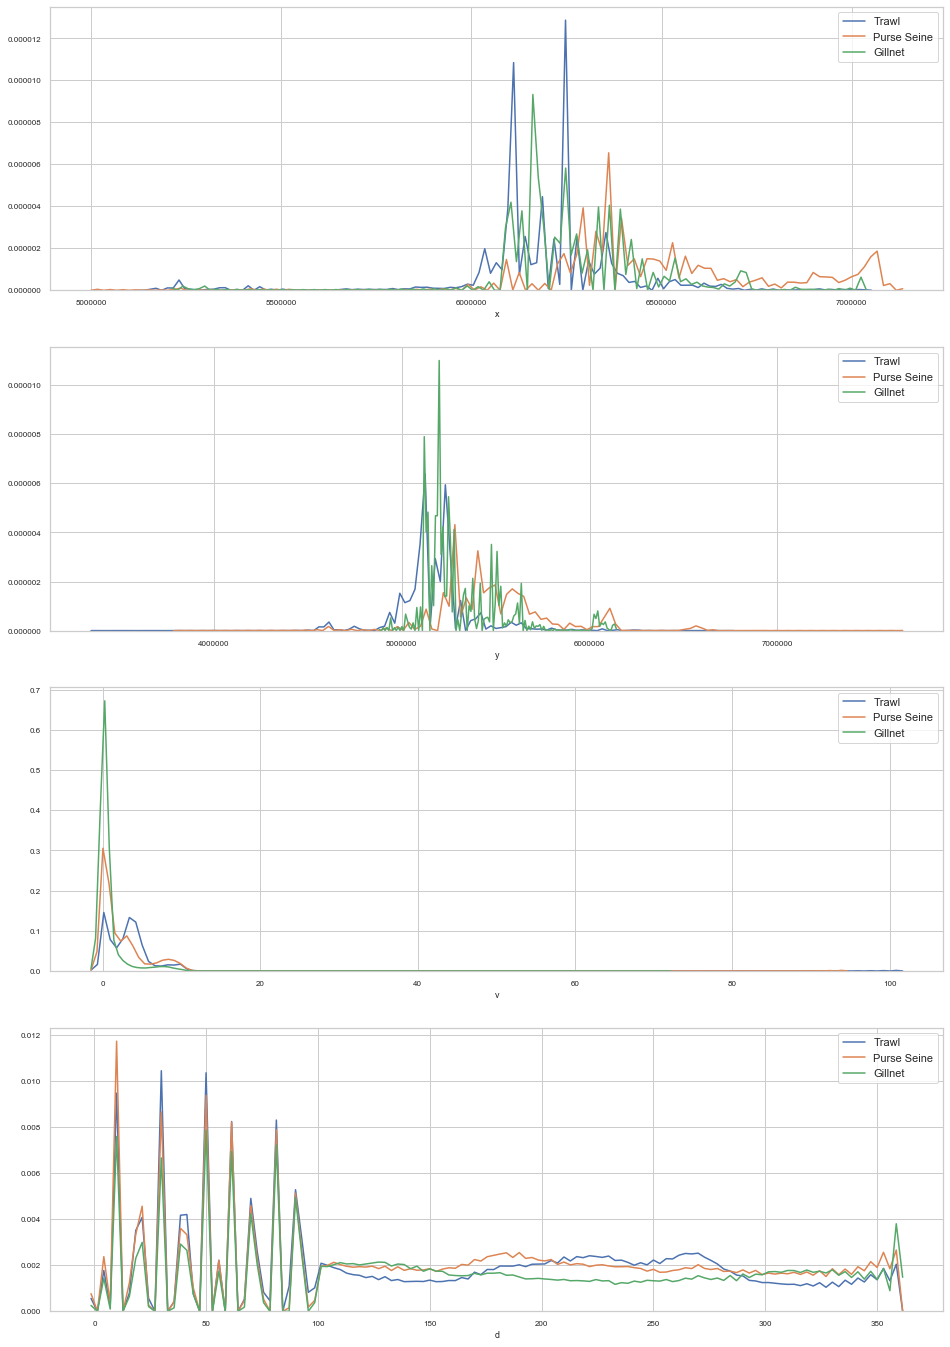

In [67]:
# 字典替换
type_dict = {'拖网': 'Trawl',
             '围网': 'Purse Seine',
             '刺网': 'Gillnet'}
df_train['type'].replace(type_dict, inplace=True)

classes = (df_train['type'].value_counts()).index
plot_feature_class_distribution(classes, df_train, features)

主要关注点在 v 和 d 上。

- 刺网在低速区分布最高，拖网分布比较平均。
- x, y 分布似乎有意义？-- 建议按HEX绘制如下：
```
{'拖网': 'Trawl',
'围网': 'Purse Seine',
'刺网': 'Gillnet'}
```

### 地图绘制

拖网

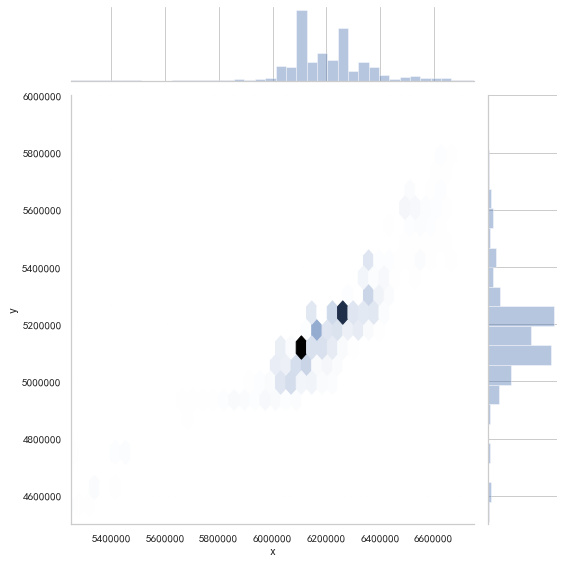

In [102]:
sns.jointplot(x='x', y='y', data=df_train[df_train['type'] == 'Trawl'], kind='hex', height=(8),
              xlim=(5250000, 5250000 + 1500000), ylim=(4500000, 4500000 + 1500000))

围网

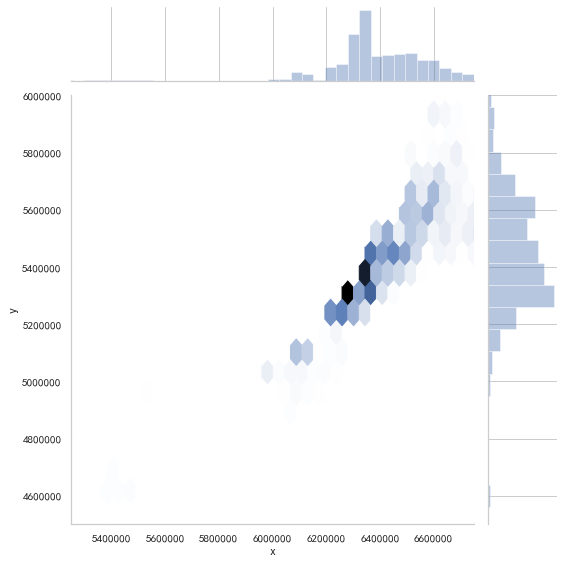

In [103]:
sns.jointplot(x='x', y='y', data=df_train[df_train['type'] == 'Purse Seine'], kind='hex', height=(8),
              xlim=(5250000, 5250000 + 1500000), ylim=(4500000, 4500000 + 1500000))


刺网

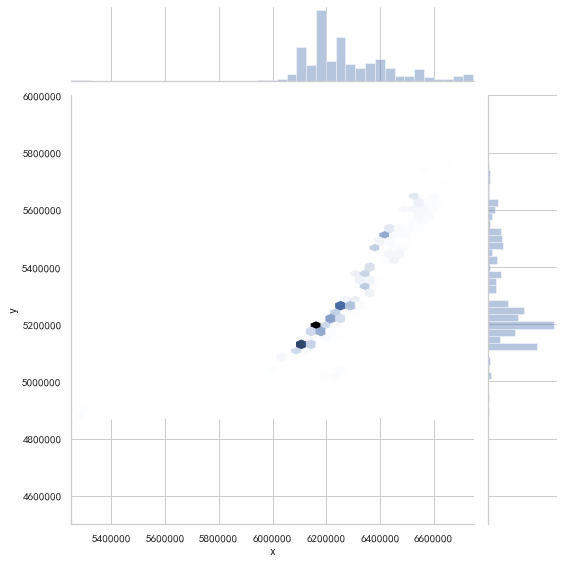

In [105]:
sns.jointplot(x='x', y='y', data=df_train[df_train['type'] == 'Gillnet'], kind='hex', height=(8),
              xlim=(5250000, 5250000 + 1500000), ylim=(4500000, 4500000 + 1500000))